ADAM NOWAK - Advanced notebook - classification

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

baby_df = pd.read_csv('amazon_baby.csv')
baby_df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [5]:
#clearing data
baby_df['review'] = baby_df['review'].astype(str).apply(remove_punctuation)
baby_df['review'] = baby_df["review"].fillna("")

### Logistic regression:  
is used to classify observations into different categories (in our case 2). Simple approach to solve classification problems. 


In [6]:
#preparing data for logistic regression 
baby_df = baby_df[baby_df["rating"] != 3]
baby_df["new_rating"] = baby_df["rating"]

baby_df.loc[baby_df["new_rating"] <= 2, 'new_rating'] = 0
baby_df.loc[baby_df["new_rating"] > 3, 'new_rating'] = 1

In [15]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

logistic_regr_data = baby_df.head(5000) #choosing first 5000 reviews 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(logistic_regr_data['review'].values)  
Y = logistic_regr_data['new_rating'].values  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#class_wight='balance' - is the compromise. Automatically adjusts the weights of the classes inversely proportional to their frequency in the dataset.
#better ability to handle imbalanced dataset. 
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       201
           1       0.95      0.87      0.91       799

    accuracy                           0.85      1000
   macro avg       0.78      0.83      0.80      1000
weighted avg       0.88      0.85      0.86      1000



1. Accuracy model is around 85%, which is pretty good, considering small dataset. 
2. Class '0' means that rating is under 3, class '1' means that rating is over 3. Precision is the number of correct predictions. So how many cases selected to each class should really be there. (ile pozytywych przypadków przez model rzeczywiscie było pozytywne)
3. Recall (czułość) - how precisely model detects every positive and negative cases in the dateset. (ile przypadków z danej klasy z całego zbioru zostało pozytywnie przydzielone do danego zbioru). 
4.  F1-score is the standard of the model. So what's the quality of the model. It's the balance between precision and recall. 


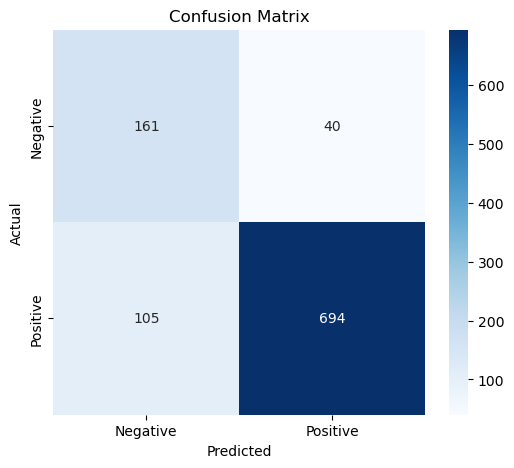

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

#Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

This matrix is used to understand the performance of the model. 
1. True Positive (TP): The number of correctly predicted positive instances.
2. False Positive (FP): The number of incorrectly predicted positive instances.
3. True Negative (TN): The number of correctly predicted negative instances.
4. False Negative (FN): The number of incorrectly predicted negative instances.

As we can observe this model is really accurate in predicting positive cases. 